<a href="https://colab.research.google.com/github/arshad831/EssesntiialSQL/blob/main/al_futtaim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# add your google drive link of the file
link = 'https://drive.google.com/file/d/1yEkNooxsGBRk1Iub1sq6eVabxcd9cuqy/'

import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]


downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('carrefour_transaction.csv') 
 
Rtl_data = pd.read_csv('carrefour_transaction.csv',encoding = 'unicode_escape')
print(Rtl_data)

       Invoice StockCode                          Description  Category  Age  \
0       536370     22728            ALARM CLOCK BAKELIKE PINK         3   38   
1       536370     22727            ALARM CLOCK BAKELIKE RED         18   34   
2       536370     22726           ALARM CLOCK BAKELIKE GREEN        11   44   
3       536370     21724      PANDA AND BUNNIES STICKER SHEET        15   32   
4       536370     21883                     STARS GIFT TAPE          1   23   
...        ...       ...                                  ...       ...  ...   
509761  581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        14   35   
509762  581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         9   37   
509763  581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK         2   35   
509764  581586     21217        RED RETROSPOT ROUND CAKE TINS        16   54   
509765  581586     20685                DOORMAT RED RETROSPOT         7   16   

        Quantity      InvoiceDate   Pri

In [ ]:
Rtl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509766 entries, 0 to 509765
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      509766 non-null  object 
 1   StockCode    509766 non-null  object 
 2   Description  508312 non-null  object 
 3   Category     509766 non-null  int64  
 4   Age          509766 non-null  int64  
 5   Quantity     509766 non-null  int64  
 6   InvoiceDate  509766 non-null  object 
 7   Price        509766 non-null  float64
 8   Customer ID  376098 non-null  float64
 9   City         509766 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 38.9+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011

Rtl_data.head()

,Invoice,StockCode,Description,Category,Age,Quantity,InvoiceDate,Price,Customer ID,City
0,536370,22728,ALARM CLOCK BAKELIKE PINK,3,38,24,12/1/2010 8:45,13.875,12583.0,Abu Dhabhi
1,536370,22727,ALARM CLOCK BAKELIKE RED,18,34,24,12/1/2010 8:45,13.875,12583.0,Abu Dhabhi
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,11,44,12,12/1/2010 8:45,13.875,12583.0,Abu Dhabhi
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,15,32,12,12/1/2010 8:45,3.145,12583.0,Abu Dhabhi
4,536370,21883,STARS GIFT TAPE,1,23,24,12/1/2010 8:45,2.405,12583.0,Abu Dhabhi


In [ ]:
#Check the shape (number of columns and rows) in the dataset
Rtl_data.shape
#(509766, 10)

(509766, 10)

In [ ]:
#Customer distribution by city
country_cust_data=Rtl_data[['City','Customer ID']].drop_duplicates()
country_cust_data.groupby(['City'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

,City,Customer ID
0,Dubai,3921


In [ ]:
#Keep only Dubai
Rtl_data = Rtl_data.query("City=='Dubai'").reset_index(drop=True)

In [ ]:
Rtl_data.shape
#(497,000)

(361878, 10)

In [ ]:
#Check for missing values in the dataset
Rtl_data.isnull().sum(axis=0)

Invoice             0
StockCode           0
Description      1454
Category            0
Age                 0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    133600
City                0
dtype: int64

In [ ]:
#Remove missing values from CustomerID column, can ignore missing values in description column
Rtl_data = Rtl_data[pd.notnull(Rtl_data['Customer ID'])]
#(361878, 10)
#Validate if there are any negative values in Quantity column
#Rtl_data.Quantity.min()

In [ ]:
Rtl_data.Quantity.min()

1

In [ ]:
#Validate if there are any negative values in UnitPrice column
Rtl_data.Price.min()

0.0

In [ ]:
#Filter out records with negative values
Rtl_data = Rtl_data[(Rtl_data['Quantity']>0)]

In [ ]:
Rtl_data.shape
#(354345, 10)

(354345, 10)

In [ ]:
Rtl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 495477
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Category     354345 non-null  int64         
 4   Age          354345 non-null  int64         
 5   Quantity     354345 non-null  int64         
 6   InvoiceDate  354345 non-null  datetime64[ns]
 7   Price        354345 non-null  float64       
 8   Customer ID  354345 non-null  float64       
 9   City         354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 29.7+ MB


In [ ]:
#Convert the string date field to datetime
Rtl_data['InvoiceDate'] = pd.to_datetime(Rtl_data['InvoiceDate'])

In [ ]:
#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity'] * Rtl_data['Price']

In [ ]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
Rtl_data.shape
#(354345, 11)

(354345, 11)

In [ ]:
Rtl_data.head()

,Invoice,StockCode,Description,Category,Age,Quantity,InvoiceDate,Price,Customer ID,City,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,15,46,6,2010-12-01 08:26:00,9.435,17850.0,Dubai,56.610
1,536365,71053,WHITE METAL LANTERN,10,34,6,2010-12-01 08:26:00,12.543,17850.0,Dubai,75.258
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,60,8,2010-12-01 08:26:00,10.175,17850.0,Dubai,81.400
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,9,28,6,2010-12-01 08:26:00,12.543,17850.0,Dubai,75.258
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,19,6,2010-12-01 08:26:00,12.543,17850.0,Dubai,75.258


## RFM Modelling

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = Rtl_data.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'Invoice': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'Invoice': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,1,285579.320
1,12747.0,2,103,15525.237
2,12748.0,0,4596,124763.001
3,12749.0,3,199,15136.256
4,12820.0,3,59,3486.658


In [ ]:
#Descriptive Statistics (Recency)
RFMScores.Monetary.describe()

count      3921.000000
mean       6896.467419
std       27683.112205
min           0.000000
25%        1110.148000
50%        2411.734000
75%        5830.793000
max      960732.010000
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


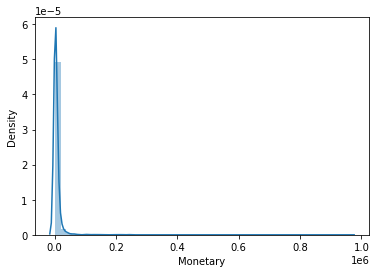

In [ ]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Monetary']

ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


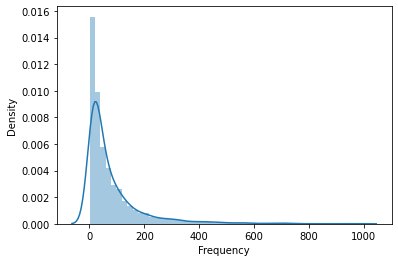

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count      3921.000000
mean       6896.467419
std       27683.112205
min           0.000000
25%        1110.148000
50%        2411.734000
75%        5830.793000
max      960732.010000
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


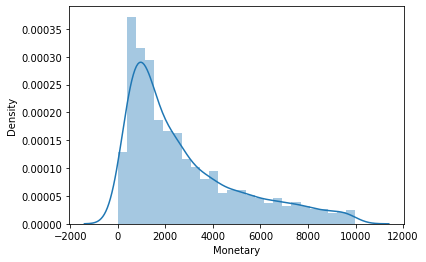

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

In [ ]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 1110.148,
  0.5: 2411.7339999999995,
  0.75: 5830.793000000001},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346.0,325,1,285579.320,4,4,1
12747.0,2,103,15525.237,1,1,1
12748.0,0,4596,124763.001,1,1,1
12749.0,3,199,15136.256,1,1,1
12820.0,3,59,3486.658,1,2,2


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
Customer ID,,,,,,,,
12346.0,325,1,285579.320,4,4,1,441,9
12747.0,2,103,15525.237,1,1,1,111,3
12748.0,0,4596,124763.001,1,1,1,111,3
12749.0,3,199,15136.256,1,1,1,111,3
12820.0,3,59,3486.658,1,2,2,122,5


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,285579.320,4,4,1,441,9,Silver
1,12747.0,2,103,15525.237,1,1,1,111,3,Platinum
2,12748.0,0,4596,124763.001,1,1,1,111,3,Platinum
3,12749.0,3,199,15136.256,1,1,1,111,3,Platinum
4,12820.0,3,59,3486.658,1,2,2,122,5,Platinum


In [ ]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,960732.010,1,1,1,111,3,Platinum
1,17450.0,8,337,719837.923,1,1,1,111,3,Platinum
2,17511.0,2,963,336930.806,1,1,1,111,3,Platinum
3,16684.0,4,277,246618.172,1,1,1,111,3,Platinum
4,14096.0,4,5111,241109.723,1,1,1,111,3,Platinum
5,13694.0,3,568,240646.594,1,1,1,111,3,Platinum
6,15311.0,0,2379,224841.230,1,1,1,111,3,Platinum
7,13089.0,2,1818,217655.571,1,1,1,111,3,Platinum
8,15769.0,7,130,208135.064,1,1,1,111,3,Platinum
9,15061.0,3,403,201776.318,1,1,1,111,3,Platinum


In [ ]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=381104dfd32ed8b724c9cb001a31e79cef7edd07262cc90a69b341b5010222e4
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)




## K-Means Clustering

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

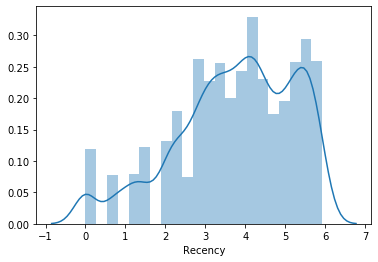

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

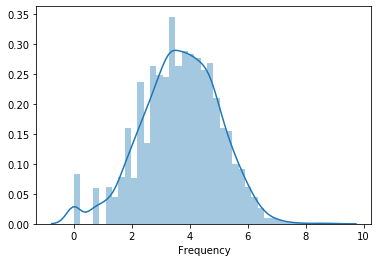

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

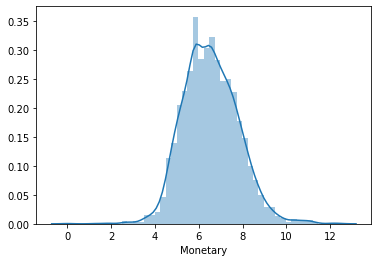

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

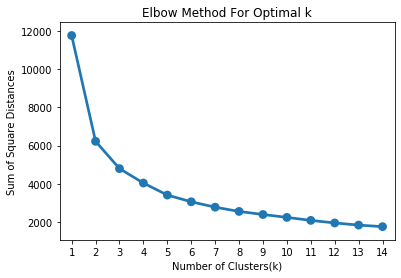

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,0
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,0
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,0
12820.0,3,59,942.34,1,2,2,122,5,Platinum,0


<Figure size 504x504 with 0 Axes>

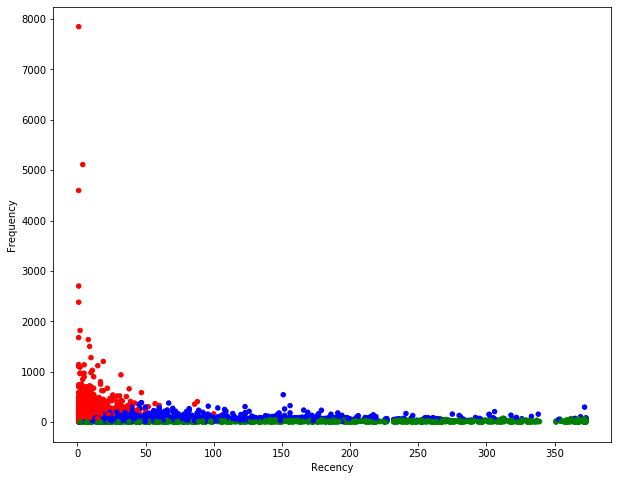

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)


In [ ]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2,blue
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,0,red
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,0,red
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,0,red
12820.0,3,59,942.34,1,2,2,122,5,Platinum,0,red
